# 1- Import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-----------
# 2- Import pizza dataset.

In [2]:
data = pd.read_csv('D://Pizza Price Prediction/Pizza datase/pizza_v2.csv')

----------
# 3- Display top 5 rows of the dataset.

In [3]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


----------
# 4- Display last 5 rows of the dataset.

In [4]:
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


--------
# 5- Find the shape of our dataset.

In [5]:
data.shape
print('Number of rows = ',data.shape[0])
print('Number of columns = ',data.shape[1])

Number of rows =  129
Number of columns =  9


-----------
# 6- Get more informations about our dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


----------
# 7- Get overall statistics of the dataset.

In [7]:
data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


-----------
# 8- Check the null values in the dataset.

In [8]:
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

###### - We don't have any null values in our dataset.

----------
# 9- Data preprocessing.

### Rename and replace some values.

###### 1- Rename the price_rupiah column to price.

In [9]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)

###### 2- Remove Rb from price column values.

In [14]:
data['price'] = data['price'].str.replace('Rp','')

###### 3- Remove the comma from price column values.

In [19]:
data['price'] = data['price'].str.replace(',','').astype('int32')

###### 4- Remove inch from diameter column values.

In [21]:
data['diameter'] = data['diameter'].str.replace('inch','').astype('float32')

----------
### Show number of columns values.

###### 1- Company.

In [25]:
data['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

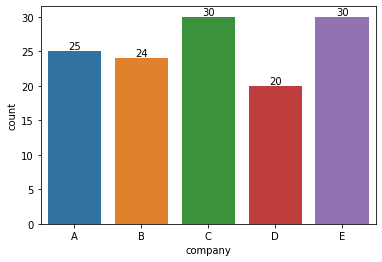

In [28]:
ax = sns.countplot(x=data['company'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

###### 2- Diameter.

In [30]:
data['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

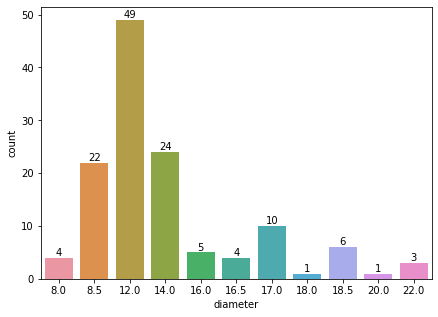

In [33]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data['diameter'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

###### 3- Price.

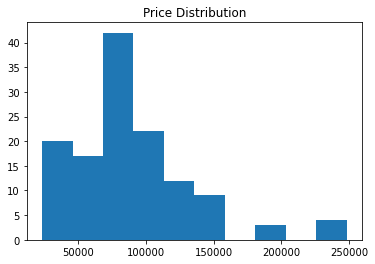

In [36]:
plt.hist(x=data['price'])
plt.title('Price Distribution')
plt.show()

###### 4- Topping.

In [41]:
data['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

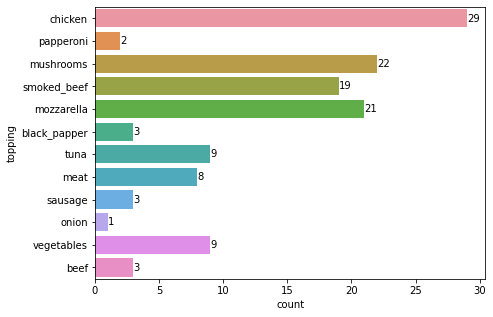

In [53]:
plt.figure(figsize=(7,5))
ax = sns.countplot(y=data['topping'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

###### 5- Variant.

In [54]:
data['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

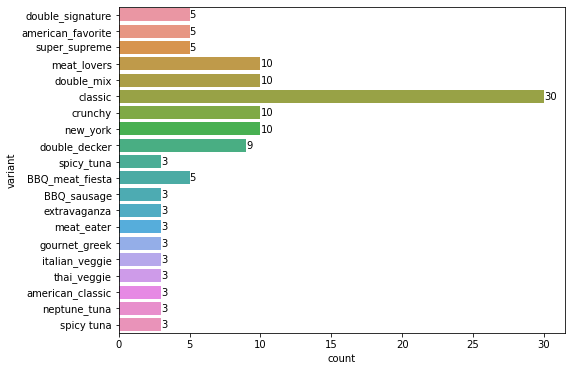

In [56]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y=data['variant'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

###### 6- Size.

In [58]:
data['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

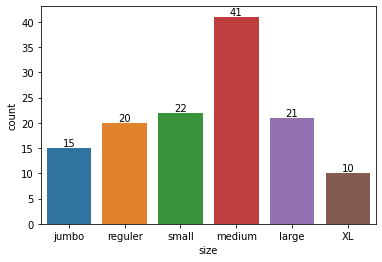

In [59]:
ax = sns.countplot(x=data['size'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

###### 7- Extra sauce.

In [60]:
data['extra_sauce'].value_counts()

yes    76
no     53
Name: extra_sauce, dtype: int64

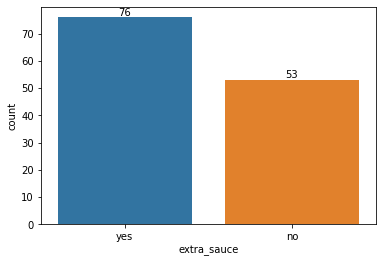

In [71]:
ax = sns.countplot(x=data['extra_sauce'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

###### 8- Extra cheese.

In [66]:
data['extra_cheese'].value_counts()

yes    86
no     43
Name: extra_cheese, dtype: int64

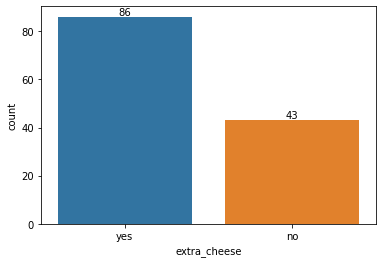

In [67]:
ax = sns.countplot(x=data['extra_cheese'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

###### 9- Extra mushrooms.

In [68]:
data['extra_mushrooms'].value_counts()

yes    72
no     57
Name: extra_mushrooms, dtype: int64

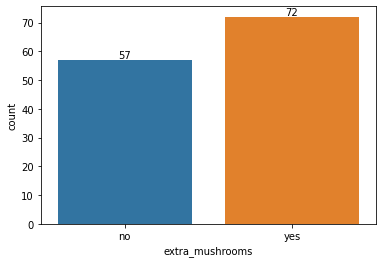

In [78]:
ax = sns.countplot(x=data['extra_mushrooms'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

----------
# 10- Bivariate ahalysis.

#### 1- Price by Company.

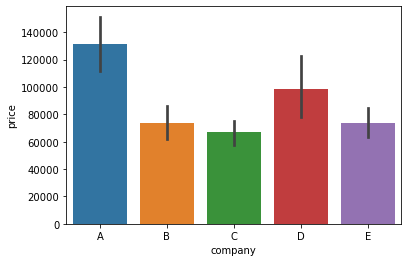

In [83]:
ax = sns.barplot(x=data['company'],y=data['price'])
plt.show()

#### 2- Price by Topping.

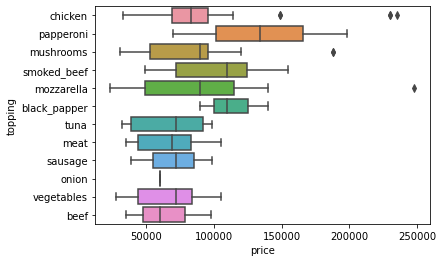

In [89]:
sns.boxplot(y=data['topping'],x=data['price'],data=data)
plt.show()

 #### 3- Price by Size.

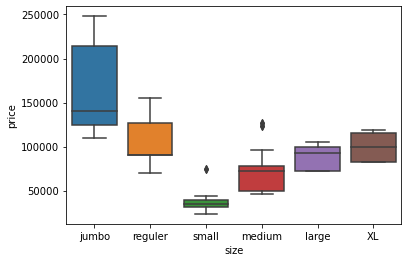

In [90]:
sns.boxplot(x=data['size'],y=data['price'])
plt.show()

---------------
# 11- Find more information from our dataset.

#### 1- Find the most expensive pizza.

In [92]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


#### 2- Find diameter of jumbo size pizza.

In [97]:
data[data['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

#### 3- Find diameter of XL size pizza.

In [102]:
data[data['size']=='XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

#### 4- Remove outliers.

In [103]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,110000,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,110000,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,110000,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,110000,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [105]:
data = data.drop(data.index[[6,11,16,80]])

------------
# 12- Label Encoding.

In [110]:
cat_cols = data.select_dtypes(include=['object']).columns

In [109]:
from sklearn.preprocessing import LabelEncoder

In [111]:
LE = LabelEncoder()

In [112]:
for col in cat_cols:
    data[col] = LE.fit_transform(data[col])

In [113]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000,22.0,2,8,1,1,1,0
1,0,198000,20.0,7,8,1,1,1,0
2,0,120000,16.0,5,8,4,1,1,1
3,0,155000,14.0,9,8,4,1,0,1
4,0,248000,18.0,4,8,1,1,0,1


--------------
# 13- Store feature matrix in X and response(target) in vector y.

In [114]:
X = data.drop('price',axis=1)
y = data['price']

---------
# 14- Spliting the dataset into training set and testing set.

In [115]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

----------
# 15- Import models.

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

-----------
# 16- Model training.

In [133]:
LG = LinearRegression().fit(X_train,y_train)
SVM = SVR().fit(X_train,y_train)
RFR = RandomForestRegressor().fit(X_train,y_train)
GBR = GradientBoostingRegressor().fit(X_train,y_train)
XGB = XGBRegressor().fit(X_train,y_train)

---------
# 17- Predicting on test data.

In [134]:
y_pred_LG = LG.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
y_pred_RFR = RFR.predict(X_test)
y_pred_GBR = GBR.predict(X_test)
y_pred_XGB = XGB.predict(X_test)

----------
# 18- Evaluating the algorithm.

In [122]:
from sklearn.metrics import r2_score

In [135]:
LG_score = r2_score(y_test,y_pred_LG)
SVM_score = r2_score(y_test,y_pred_SVM)
RFR_score = r2_score(y_test,y_pred_RFR)
GBR_score = r2_score(y_test,y_pred_GBR)
XGB_score = r2_score(y_test,y_pred_XGB)

In [136]:
print(LG_score,SVM_score,RFR_score,GBR_score,XGB_score)

0.6712827779795154 -0.09509798434366301 0.8295481009345909 0.8850440034269074 0.8917033255036354


In [137]:
final_data = pd.DataFrame({'Models':['LG','SVM','RGR','GBR','XGB'],
                          'Accuracy':[LG_score,SVM_score,RFR_score,GBR_score,XGB_score]})
final_data.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy
4,XGB,0.891703
3,GBR,0.885044
2,RGR,0.829548
0,LG,0.671283
1,SVM,-0.095098


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

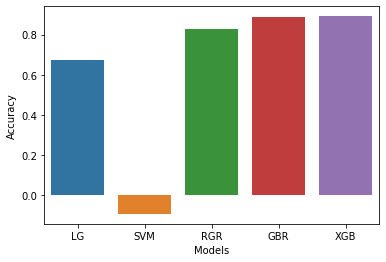

In [131]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])

-------
# 19- Find the feature importance.

#### 1- Random Forest.

In [138]:
RFR.feature_importances_

array([0.03008074, 0.61668102, 0.03292452, 0.12097565, 0.16074046,
       0.02318421, 0.0116936 , 0.0037198 ])

In [144]:
fea_RFR = pd.Series(RFR.feature_importances_,index=X_train.columns)

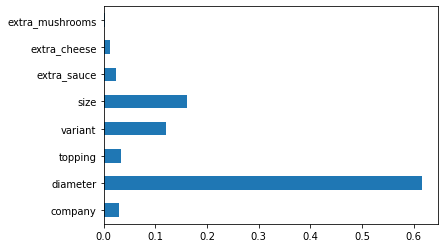

In [146]:
fea_RFR.plot(kind='barh')
plt.show()

#### 2- Gradient Boosting Regressor.

In [143]:
GBR.feature_importances_

array([0.00694386, 0.63626538, 0.05249047, 0.10048259, 0.16294249,
       0.03394016, 0.00364573, 0.00328931])

In [147]:
fea_GBR = pd.Series(GBR.feature_importances_,index=X_train.columns)

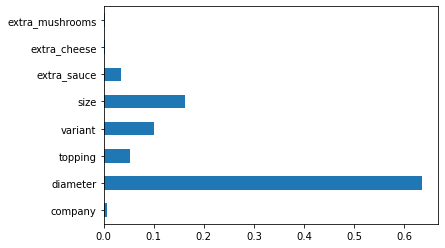

In [148]:
fea_GBR.plot(kind='barh')
plt.show()

#### 3- XGBRegressor.

In [149]:
XGB.feature_importances_

array([0.00327828, 0.42463964, 0.02003679, 0.04037103, 0.4036423 ,
       0.08753515, 0.01517959, 0.00531718], dtype=float32)

In [150]:
fea_XGB = pd.Series(XGB.feature_importances_,index=X_train.columns)

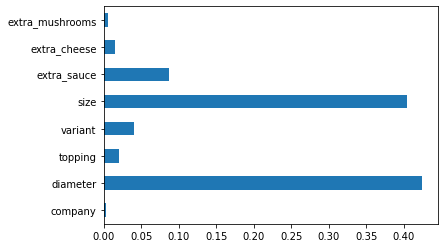

In [151]:
fea_XGB.plot(kind='barh')
plt.show()

-----------
# 20- Build the final model.

In [152]:
X = data.drop('price',axis=1)
y = data['price']

In [153]:
XGB.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

--------
# 21- Saving model.

In [154]:
import joblib

In [155]:
joblib.dump(XGB,'Pizza_Price_predict')

['Pizza_Price_predict']

In [156]:
model = joblib.load('Pizza_Price_predict')

In [160]:
df = pd.DataFrame({'company':1,'diameter':22.0,'topping':2,'variant':8,
                  'size':1,'extra_sauce':1,'extra_cheese':1,'extra_mushrooms':1},index=[0])

In [161]:
model.predict(df)

array([224951.7], dtype=float32)

-------------
# 22- GUI.

In [162]:
import joblib
from tkinter import *

In [171]:
def show_entry():
    p1 = int(e1.get())
    p2 = float(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    model = joblib.load('Pizza_Price_predict')
    df = pd.DataFrame({'company':p1,'diameter':p2,'topping':p3,'variant':p4,
                  'size':p5,'extra_sauce':p6,'extra_cheese':p7,'extra_mushrooms':p8},index=[0])
    result = model.predict(df)
    Label(master,text=result).grid(row=9)

master = Tk()
master.title('Pizza Price Prediction')
label = Label(master,text='Pizza Price Prediction',bg='blue',fg='white').grid(row=0,columnspan=2)

Label(master,text='Enter company').grid(row=1)
Label(master,text='Enter diameter').grid(row=2)
Label(master,text='Enter topping').grid(row=3)
Label(master,text='Enter variant').grid(row=4)
Label(master,text='Enter size of pizza').grid(row=5)
Label(master,text='Extra_sauce or No [1/0]').grid(row=6)
Label(master,text='Extra_cheese or No [1/0]').grid(row=7)
Label(master,text='Extra_mushrooms or No [1/0]').grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text='Predict',command=show_entry).grid()
mainloop()

In [167]:
data

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000,22.0,2,8,1,1,1,0
1,0,198000,20.0,7,8,1,1,1,0
2,0,120000,16.0,5,8,4,1,1,1
3,0,155000,14.0,9,8,4,1,0,1
4,0,248000,18.0,4,8,1,1,0,1
...,...,...,...,...,...,...,...,...,...
124,4,39000,8.5,10,16,5,1,1,1
125,4,72000,12.0,10,16,3,1,1,1
126,4,99000,14.0,10,16,2,1,1,1
127,4,44000,8.5,3,0,5,1,0,1
